# 大批量生成
1. 读取3000+篇文献，从中选取 400 篇文献
2. 走pipeline数据生成流程

In [1]:
from utils.article_chunks_v2 import read_file_names
data_dir = "data"
filenames = read_file_names(data_dir, ext=".md")
# filenames = filenames[:5]

len(file_names): 3373


In [2]:
from utils.article_filter import get_embedding_batch
filenames_dir = "data"
embeddings = get_embedding_batch(filenames_dir)

len(file_names): 3373
batch 0, total 169, now processing: 20, ['1,8-萘酰亚胺类有机小分子电致发光材料的研究进展_王启_llm_correct.md', '10万象素a-Si_TFT有源矩阵的优化技术_徐重阳_llm_correct.md', '10大新显示技术_llm_correct.md', '12.7cm彩色AM-OLED显示器分场驱动研究_沈亮_llm_correct.md', '12.7cm彩色AM-OLED显示屏的驱动模块_张繁_llm_correct.md', '12.9英寸高分辨率多色TFT—LCD_师庆华_llm_correct.md', '125mm彩色AMOLED的多晶硅TFT基板_孟志国_llm_correct.md', '128×64点阵式OLED的驱动电路_董桂芳_llm_correct.md', '13.8英寸高分辨率多色TFT—LCD_王阳_llm_correct.md', '1670万种色彩的15英寸TFT液晶显示_金锐_llm_correct.md', '17.8cm彩色AMOLED驱动模块的研制_尹盛_llm_correct.md', '2-对联苯-8-羟基喹啉锌...及其应用于新型白光OLED_赵婷_llm_correct.md', '2.7”a-Si_TFT矩阵(英文)_熊绍珍_llm_correct.md', '2005_OLED行业一瞥_王力_llm_correct.md', '200mm×200mm_OLED步进投影曝光机_周畅_llm_correct.md', '22cm反射式彩色TFT_LCD_孙再吉_llm_correct.md', '22英寸广色域——HP_L2245w_真水无味_llm_correct.md', '256×64点阵液晶显示器模块_吴训_llm_correct.md', '256级灰度OLED驱动电路_陈志明_llm_correct.md', '2英寸全彩色AM-OLED显示屏的驱动方案_尹盛_llm_correct.md']
batch 1, total 169, now processing: 20, ['3英寸黑白a-siTFT-LCD驱动系统_孙明峰_llm_correct.md', '400×640象素液晶显示的研制_杨

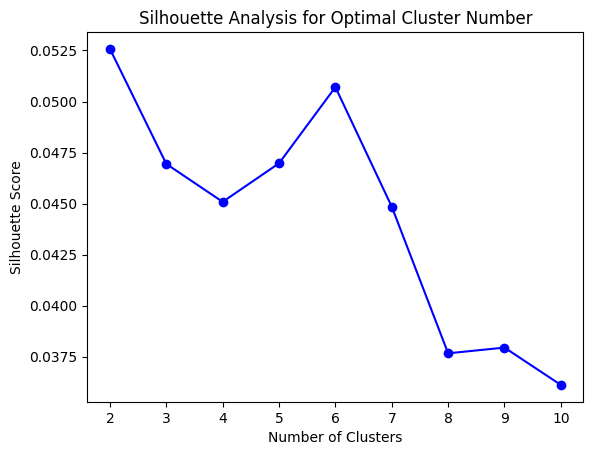

In [ ]:
# 主题聚类分析
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 降维可视化
# pca = PCA(n_components=2)
# vectors_2d = pca.fit_transform(embeddings)

# 寻找最佳聚类数
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 绘制轮廓系数曲线
plt.plot(range_n_clusters, silhouette_scores, "bo-")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal Cluster Number")
plt.show()

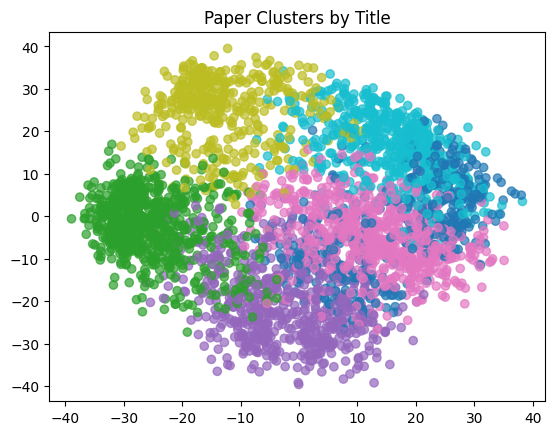

In [ ]:
from sklearn.decomposition import PCA
# 使用最佳聚类数进行最终聚类
optimal_n_clusters = 6
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster = kmeans.fit_predict(embeddings)

# 降维可视化
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(embeddings)

# 可视化聚类结果
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=cluster, cmap='tab10', alpha=0.7)
plt.title("Paper Clusters by Title")
plt.show()

Diversity: 0.2150


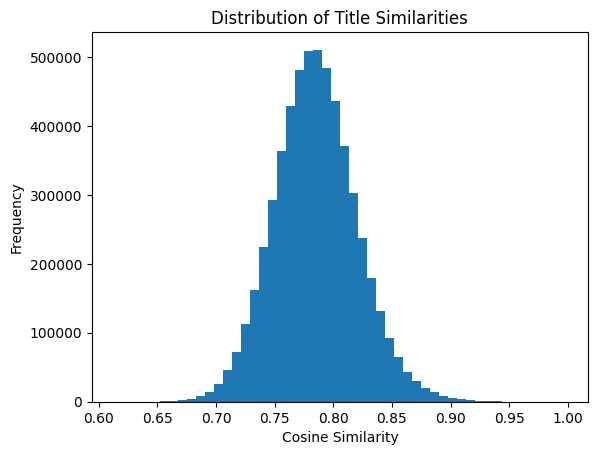

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# 计算标题相似度矩阵
similarity_matrix = cosine_similarity(embeddings)
# 
avg_similarity = np.mean(similarity_matrix)
diversity = 1 - avg_similarity
print(f"Diversity: {diversity:.4f}")
# 相似度分布可视化
plt.hist(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)], bins=50)
plt.title("Distribution of Title Similarities")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

In [8]:
len(embeddings), len(embeddings[0])

(3373, 2560)

In [2]:
import pickle

# 假设 embeddings 是一个 Python list，形状为 (3373, 2560)
# 这里模拟一个示例数据
# embeddings = [[float(i + j) for j in range(2560)] for i in range(3373)]

# 打印原始数据的形状
# print(f"原始数据形状: len(embeddings)={len(embeddings)}, len(embeddings[0])={len(embeddings[0])}")

# 保存 embeddings 到文件
def save_embeddings_pickle(embeddings, file_path):
    """使用 pickle 保存 embeddings"""
    with open(file_path, 'wb') as f:
        pickle.dump(embeddings, f)
    print(f"Embeddings 已保存到 {file_path}")

# 从文件加载 embeddings
def load_embeddings_pickle(file_path):
    """使用 pickle 加载 embeddings"""
    with open(file_path, 'rb') as f:
        embeddings = pickle.load(f)
    print(f"从 {file_path} 加载的 embeddings 形状: len={len(embeddings)}, len[0]={len(embeddings[0])}")
    return embeddings

# # 文件路径
# file_path = "embeddings.pkl"

# # 保存 embeddings
# save_embeddings_pickle(embeddings, file_path)

# # 加载 embeddings
# loaded_embeddings = load_embeddings_pickle(file_path)

# # 验证数据是否一致
# assert embeddings == loaded_embeddings, "加载的数据与原始数据不一致"
# print("验证通过: 加载的数据与原始数据一致")

In [ ]:
from utils.article_filter import get_embedding_batch, balanced_sample_papers
from utils.article_chunks_v2 import read_file_names
data_dir = "data"
filenames = read_file_names(data_dir, ext=".md")
# 读取文件名和嵌入向量
data_dir = "data"
# embeddings, filenames = get_embedding_batch(data_dir)
# 加载 embeddings
file_path = "embeddings.pkl"
embeddings = load_embeddings_pickle(file_path)
# 改进的平衡抽样方法
selected_papers, selected_clusters, cluster_info = balanced_sample_papers(
    filenames, embeddings, n_clusters=6, total_samples=400, min_samples=20
)

len(file_names): 3373
从 embeddings.pkl 加载的 embeddings 形状: len=3373, len[0]=2560
成功将 397 篇论文标题写入 selected_papers.txt


: 

In [ ]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results_v1_01.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

In [ ]:
import json
import re
import matplotlib.pyplot as plt
from collections import defaultdict

def extract_overall_quality(content_str):
    """
    使用正则表达式从content字符串中提取overall评分
    避免复杂的JSON解析，直接匹配"overall": "..."模式
    """
    # 匹配 "overall": "value" 的模式，不区分大小写
    match = re.search(r'"overall"\s*:\s*"([^"]+)"', content_str, re.IGNORECASE)
    if match:
        return match.group(1).lower()
    return None

def analyze_quality_ratings(jsonl_file):
    # 初始化计数器
    quality_counts = defaultdict(int)
    total_entries = 0
    parse_errors = 0
    
    # 读取jsonl文件并统计质量评级
    with open(jsonl_file, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data = json.loads(line)
                # 获取content字符串
                content_str = data['response']['body']['choices'][0]['message']['content']
                
                # 使用正则表达式提取overall评分
                quality = extract_overall_quality(content_str)
                
                if quality in ['high', 'medium', 'low']:
                    quality_counts[quality] += 1
                    total_entries += 1
                else:
                    parse_errors += 1
            except (json.JSONDecodeError, KeyError, AttributeError) as e:
                parse_errors += 1
                continue
    
    # 计算百分比
    quality_stats = {}
    for quality, count in quality_counts.items():
        percentage = (count / total_entries) * 100 if total_entries > 0 else 0
        quality_stats[quality] = {'count': count, 'percentage': percentage}
    
    return quality_stats, total_entries, parse_errors

def plot_quality_stats(quality_stats, total_entries):
    if total_entries == 0:
        print("No valid data to plot.")
        return
    
    # 准备数据
    labels = ['High', 'Medium', 'Low']
    counts = [quality_stats.get('high', {}).get('count', 0),
              quality_stats.get('medium', {}).get('count', 0),
              quality_stats.get('low', {}).get('count', 0)]
    percentages = [quality_stats.get('high', {}).get('percentage', 0),
                   quality_stats.get('medium', {}).get('percentage', 0),
                   quality_stats.get('low', {}).get('percentage', 0)]
    
    # 创建图表
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # 饼图
    ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90,
            colors=['#4CAF50', '#FFC107', '#F44336'])
    ax1.set_title('Quality Rating Distribution')
    
    # 柱状图
    bars = ax2.bar(labels, counts, color=['#4CAF50', '#FFC107', '#F44336'])
    ax2.set_title('Quality Rating Counts')
    ax2.set_ylabel('Count')
    ax2.set_xlabel('Quality Rating')
    
    # 在柱状图上添加数值标签
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height}\n({height/total_entries*100:.1f}%)',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def show_quality(jsonl_file):
    quality_stats, total_entries, parse_errors = analyze_quality_ratings(jsonl_file)
    
    # 打印统计结果
    print(f"Total entries processed: {total_entries + parse_errors}")
    print(f"Successfully parsed: {total_entries}")
    print(f"Parse errors: {parse_errors}")
    print("\nQuality Statistics:")
    for quality, stats in quality_stats.items():
        print(f"{quality.capitalize()}: Count = {stats['count']}, Percentage = {stats['percentage']:.2f}%")
    
    # 绘制图表
    plot_quality_stats(quality_stats, total_entries)


In [2]:
print(f"""Total entries processed: 1600
Successfully parsed: 1600
Parse errors: 0

Quality Statistics:
High: Count = 1448, Percentage = 90.5%%
Medium: Count = 152, Percentage = 9.5%""")

Total entries processed: 1600
Successfully parsed: 1600
Parse errors: 0

Quality Statistics:
High: Count = 1448, Percentage = 90.5%%
Medium: Count = 152, Percentage = 9.5%


Total entries processed: 40
Successfully parsed: 40
Parse errors: 0

Quality Statistics:
High: Count = 24, Percentage = 60.00%
Medium: Count = 16, Percentage = 40.00%


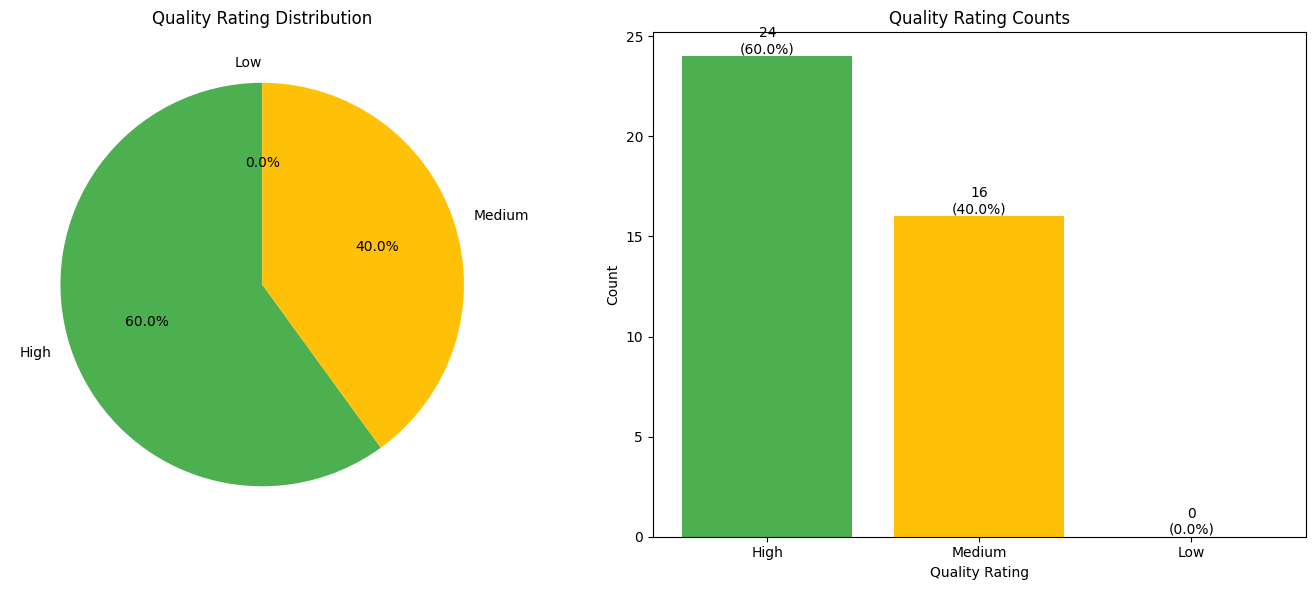

In [9]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results_v2_02.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

Total entries processed: 40
Successfully parsed: 40
Parse errors: 0

Quality Statistics:
High: Count = 33, Percentage = 82.50%
Medium: Count = 7, Percentage = 17.50%


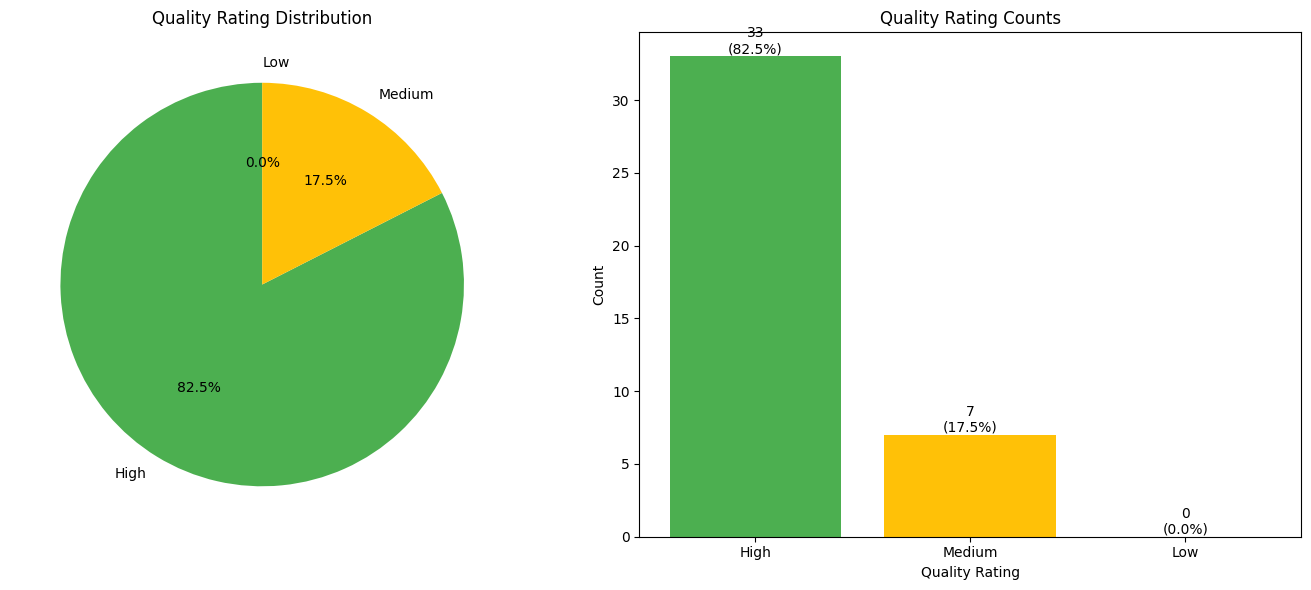

In [10]:
from utils.data_eval import show_quality
jsonl_file = 'outputs_excel/results_v1_02.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

Total entries processed: 40
Successfully parsed: 40
Parse errors: 0

Quality Statistics:
High: Count = 38, Percentage = 95.00%
Medium: Count = 2, Percentage = 5.00%


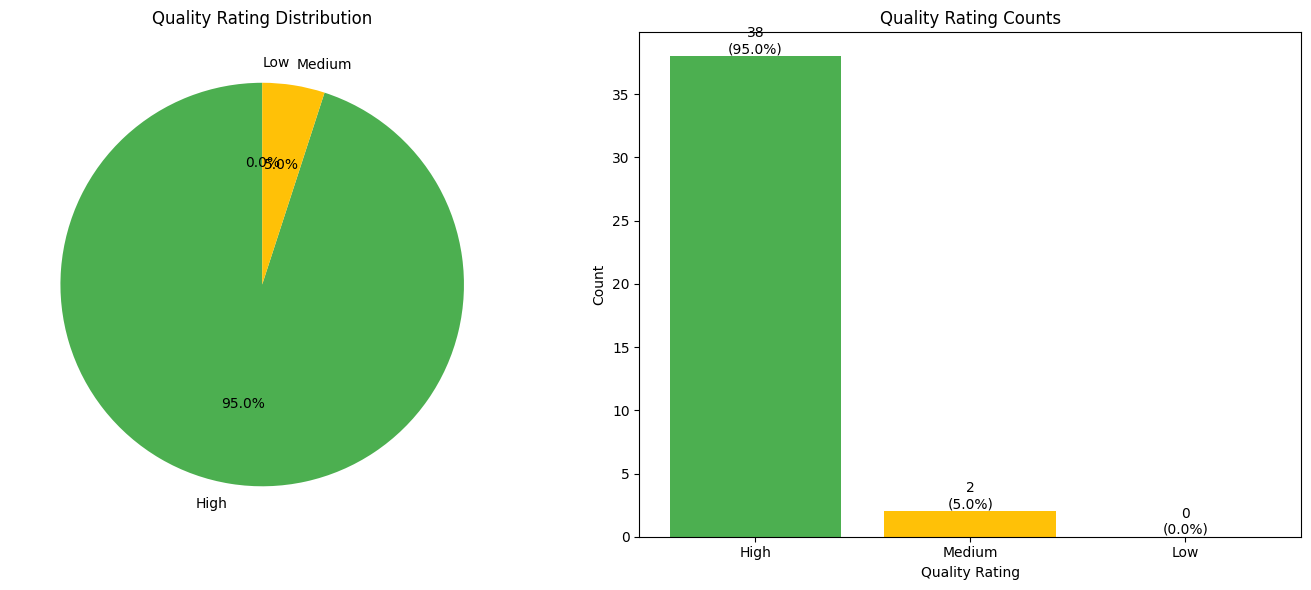

In [ ]:
jsonl_file = 'outputs_excel/results_v1_01.jsonl'  # 替换为您的jsonl文件路径
show_quality(jsonl_file)

Total entries processed: 40
Successfully parsed: 40
Parse errors: 0

Quality Statistics:
High: Count = 16, Percentage = 40.00%
Medium: Count = 23, Percentage = 57.50%
Low: Count = 1, Percentage = 2.50%


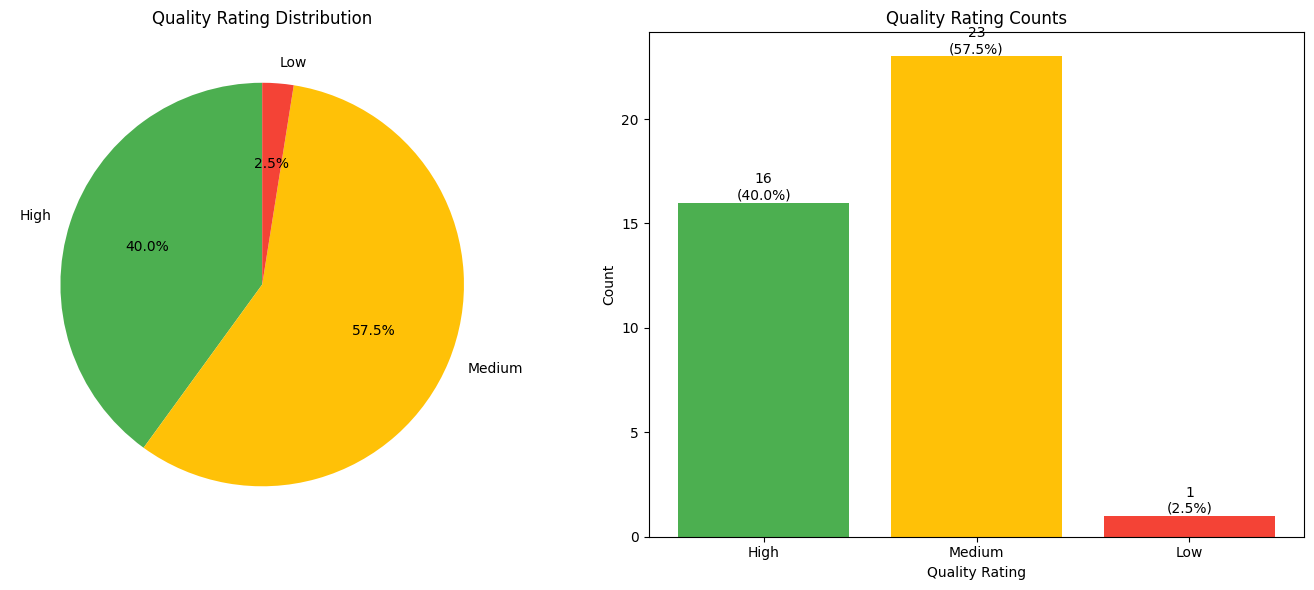

In [7]:
jsonl_file = 'outputs_excel/results_v2_01.jsonl'  # 替换为您的jsonl文件路径
main(jsonl_file)

Total entries processed: 42
Successfully parsed: 42
Parse errors: 0

Quality Statistics:
High: Count = 37, Percentage = 88.10%
Medium: Count = 5, Percentage = 11.90%


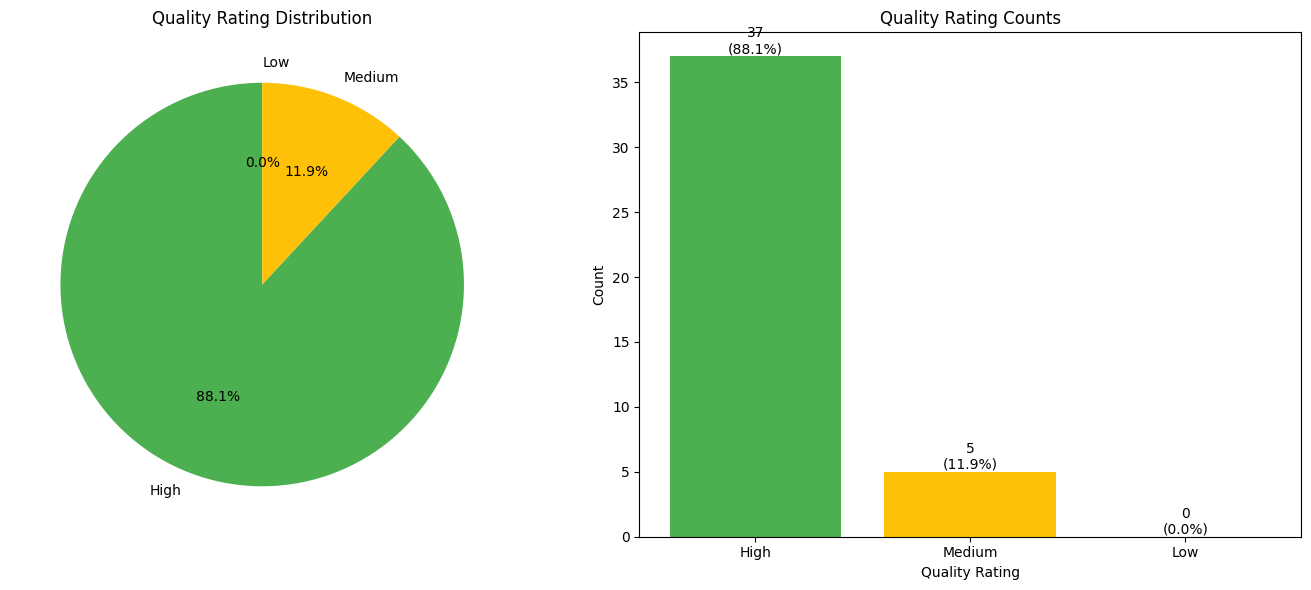

In [5]:
jsonl_file = 'outputs_excel/results_v2.jsonl'  # 替换为您的jsonl文件路径
main(jsonl_file)

Total entries processed: 42
Successfully parsed: 42
Parse errors: 0

Quality Statistics:
High: Count = 17, Percentage = 40.48%
Medium: Count = 25, Percentage = 59.52%


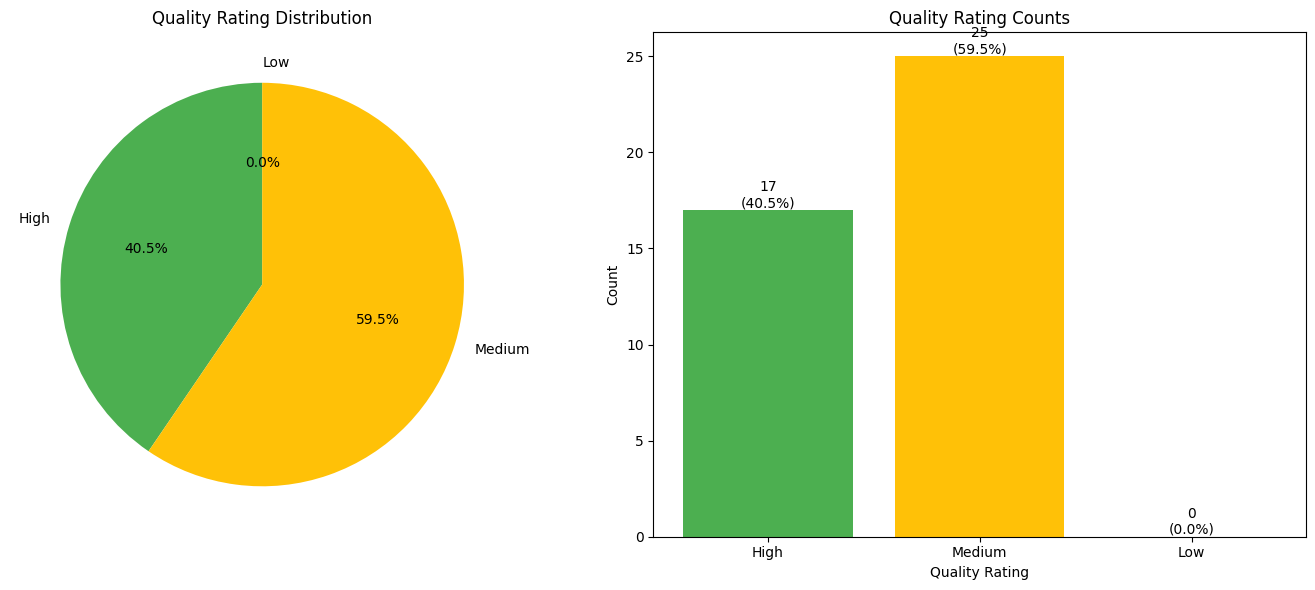

In [4]:
jsonl_file = 'outputs_excel/results_v1.jsonl'  # 替换为您的jsonl文件路径
main(jsonl_file)